In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [11]:
data = {}

In [12]:
df1 = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
data['DSPy (with retry)'] = df1[df1['Program'].str.contains('DSPy')]
data['MTLLM'] = df1[df1['Program'].str.contains('Jac')]
df1.head()

,Unnamed: 0,QuestionID,Question,GivenAnswer,Model,Program,Output,ExactMatch,Failed,Time(s),PromptTokens,CompletionTokens,RawPrompt,RawResponse
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy,72,True,False,2.917058,114,73,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clokvliFEWp61rjxSsTWIolcVD5..."
1,1,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy_Compiled,2,False,False,2.561274,567,16,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clr2LaeEkjBavtMBBCcHzB5rnaR..."
2,2,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,Jac,72,True,False,3.693238,180,96,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9cmUaGOew5CgQKgc5mw8wWJi7JtR..."
3,3,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy,72,True,False,2.516877,114,99,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clvwrzbdANXZQyUyxP782k1kclq..."
4,4,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy_Compiled,2,False,False,2.626880,567,25,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clw4spuwt38tJitaUmTWW8CtzqG..."


In [13]:
df2 = pd.read_csv("ModelSweep-23-06-2024-1352.csv")
data['DSPy (no retry)'] = df2[df2['Program'].str.contains('DSPy_Single_Trial')]
data['DSPy (compiled)'] = df2[df2['Program'].str.contains('DSPy_Compiled')]
df2

,Unnamed: 0,QuestionID,Question,GivenAnswer,Model,Program,Output,ExactMatch,Failed,Time(s),PromptTokens,CompletionTokens,RawPrompt,RawResponse
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy_Single_Trial,72.0,True,False,3.219319,114,73,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clokvliFEWp61rjxSsTWIolcVD5..."
1,1,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy_Compiled,72.0,True,False,3.012192,597,59,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9dLfkfpG1kZhtlxHS5R1YbHNPTnE..."
2,2,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy_Single_Trial,72.0,True,False,2.432062,114,99,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clvwrzbdANXZQyUyxP782k1kclq..."
3,3,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy_Compiled,72.0,True,False,2.988254,597,72,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9dLfsMTXjB2Job1PjmGqqtWcuyFC..."
4,4,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4-turbo,DSPy_Single_Trial,NaN,False,True,0.000000,114,122,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clwDOOlAjfnGtLx8JzNpCS4It8F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4,DSPy_Compiled,2.0,True,False,7.332499,617,111,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9dPHRHVc4FJLfU4VuvuR4P295TFb..."
2396,2396,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4-turbo,DSPy_Single_Trial,NaN,False,True,0.000000,134,235,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9cra9ge5bYZdlhJqYoVfrXMiViwb..."
2397,2397,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4-turbo,DSPy_Compiled,2.0,True,False,15.344427,1268,348,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9dPHbR3l7edEwSEAniCvHoXJcNzp..."
2398,2398,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4o,DSPy_Single_Trial,NaN,False,True,0.000000,132,234,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9byrHk7UxqaY4aFeteEbqUUB2LBG..."


In [14]:
handles = ['DSPy (no retry)','DSPy (with retry)','DSPy (compiled)','MTLLM']
df = pd.concat([data[framework] for framework in handles])

In [15]:
df

,Unnamed: 0,QuestionID,Question,GivenAnswer,Model,Program,Output,ExactMatch,Failed,Time(s),PromptTokens,CompletionTokens,RawPrompt,RawResponse
0,0,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-3.5-turbo,DSPy_Single_Trial,72.0,True,False,3.219319,114,73,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clokvliFEWp61rjxSsTWIolcVD5..."
2,2,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4,DSPy_Single_Trial,72.0,True,False,2.432062,114,99,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clvwrzbdANXZQyUyxP782k1kclq..."
4,4,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4-turbo,DSPy_Single_Trial,NaN,False,True,0.000000,114,122,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clwDOOlAjfnGtLx8JzNpCS4It8F..."
6,6,0,Natalia sold clips to 48 of her friends in Apr...,72,gpt-4o,DSPy_Single_Trial,NaN,False,True,0.000000,110,138,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9by5h5em9wZHXOMyFE6USde0eR5s..."
8,8,1,Weng earns $12 an hour for babysitting. Yester...,10,gpt-3.5-turbo,DSPy_Single_Trial,NaN,False,True,0.000000,106,100,"[""Given the fields `question`, produce the fie...","[{""id"": ""chatcmpl-9clwfpXcsdwafgkbmN6TQtSVDbVw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,3587,298,There were sweets on the table. Jack came and ...,22,gpt-4o,Jac,22,True,False,7.820949,185,179,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9crZZ72yBJMMtLMPGGXXNL37Lb8Q..."
3590,3590,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-3.5-turbo,Jac,2,True,False,3.652010,200,107,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9crZpwOVpII7JApRkd1V2qPbdj9P..."
3593,3593,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4,Jac,2,True,False,5.734989,200,95,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9cra28vHHw05PssG1cOrKoK5tZQW..."
3596,3596,299,Basil gets 1/2 of a dog cookie in the morning...,2,gpt-4-turbo,Jac,2,True,False,5.684720,200,130,"[""[System Prompt]\nThis is an operation you mu...","[{""id"": ""chatcmpl-9craUFG52X8vGcWM7wOhqNLvcoar..."


In [16]:
# df = pd.read_csv("ModelSweep-23-06-2024-1352.csv")
# df = df[~df['Program'].str.contains('DSPy_Compiled')]
# df = df[df["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]

[<matplotlib.lines.Line2D object at 0x7fc1c2754050>, <matplotlib.lines.Line2D object at 0x7fc1c2754590>, <matplotlib.lines.Line2D object at 0x7fc1c2753c50>, <matplotlib.lines.Line2D object at 0x7fc1c2753920>] 
 ['DSPy (no retry)', 'DSPy (with retry)', 'DSPy (compiled)', 'MTLLM']


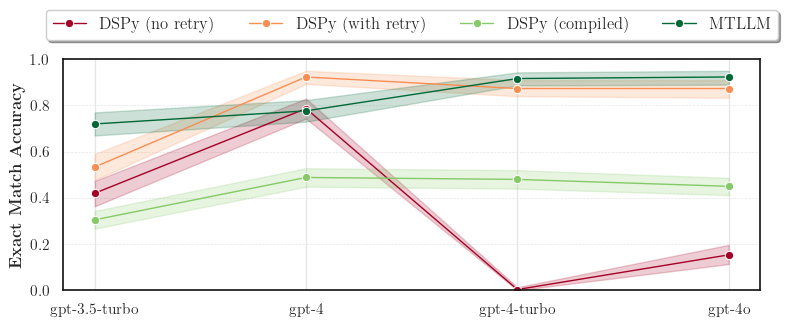

In [17]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.25), plt.cm.RdYlGn(0.75),plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = ['DSPy (no retry)','DSPy (with retry)','DSPy (compiled)','MTLLM']
print(handles, '\n', labels)
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.ylim(0, 1)
plt.show
plt.savefig('ExactMatchAcccuracy.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

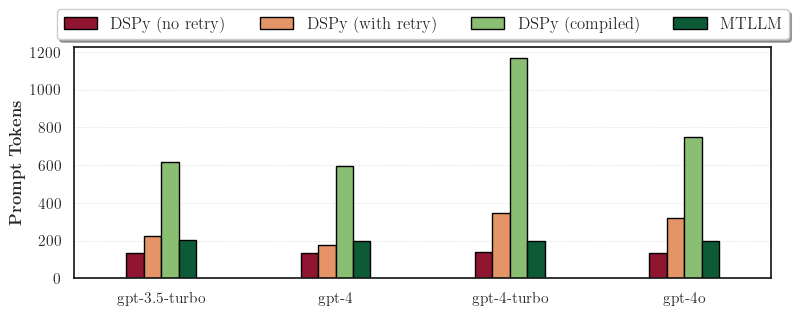

In [18]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="PromptTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Prompt Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('PromptTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

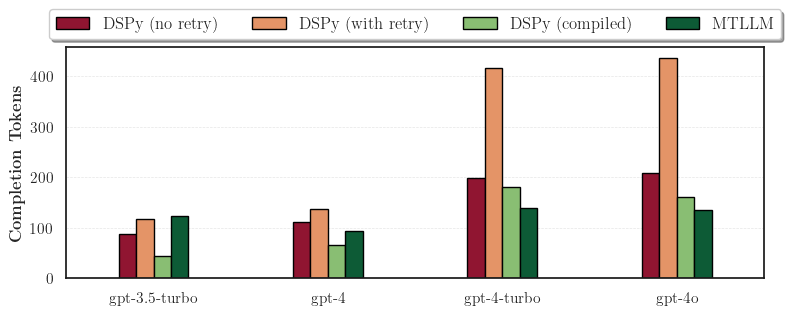

In [19]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="CompletionTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('CompletionTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

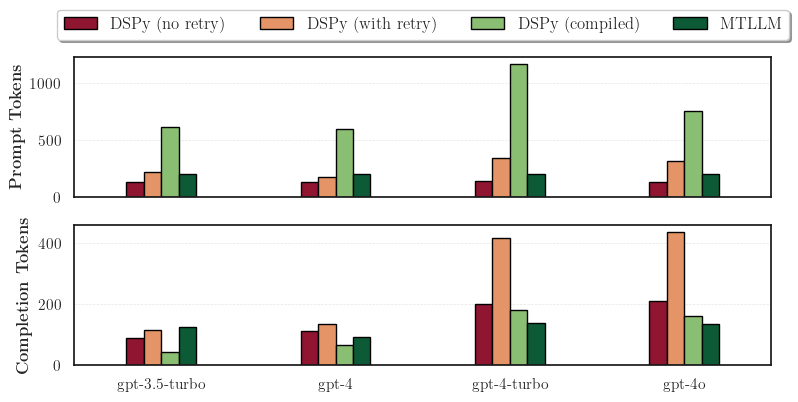

In [20]:
fig, axes = plt.subplots(2,1,figsize=(9, 4))

for i,plot in enumerate(["PromptTokens","CompletionTokens"]):
    # colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
    sns.barplot(x="Model", y=plot, hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=axes[i],edgecolor='black', linewidth=1)
    axes[i].set_xlabel("")
    # axes[i].set_ylabel("")
    if plot == "PromptTokens":
        axes[i].set_ylabel(r"\centering\textbf{Prompt Tokens}", fontsize=12)
        axes[i].legend().set_visible(False)
        axes[i].set_xticklabels([])
    else:
        axes[i].set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
        axes[i].legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 2.6), ncol=4)
    axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
    # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # plt.ylim(0, 400)
    plt.savefig('Token_usage.png', dpi=300, bbox_inches='tight')
plt.show